In [50]:
# this is a code to solve axion perturbation 
# during radiation domination by hand. --Chen 2020/05/11
# used as cross-check with the CLASS results
import matplotlib
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy as sp
from scipy import interpolate
from MyUnit import SIUnit, NaturalUnit
from scipy.interpolate import interp1d

In [42]:
# choose the specific CLASS version
classy_path = '/a/home/cc/students/physics/chensun/tomerv_storage/Code/class_axion/python/build/lib.linux-x86_64-2.7'
import sys
sys.path.insert(1, classy_path)
from classy import Class

import classy
classy.__file__

'/a/home/cc/students/physics/chensun/tomerv_storage/Code/class_axion/python/build/lib.linux-x86_64-2.7/classy.so'

# Relevant Scales

In [43]:
# exercise 0
# Define your cosmology (what is not specified will be set to CLASS default parameters)
params = {
    'gauge':'synchronous',
    'input_verbose' : 1,
    'background_verbose' : 1,
    'thermodynamics_verbose': 1,
    'perturbations_verbose': 2,
    'h': 0.673,
    'omega_b': 0.02205,
    'omega_cdm': 0.1199,
    'tau_reio': 0.089,
    'A_s':math.exp(3.089)*10**-10,
    'n_s':0.9603,
    'N_ur' : 2.03351,
    'N_ncdm' : 1,
    'm_ncdm' : 0.06,
    'T_ncdm' : 0.715985, 
    'T_cmb' : 2.2755,
    # Output setup
    'output': 'tCl,pCl,lCl,mPk',
    'lensing': 'yes',
    'l_max_scalars': 3000, 
    'k_output_values':'0.01, 0.1, 1.0, 3.0', 
    'compute damping scale': 'Y'
}

try:
    cosmo.struct_cleanup()
except:
    pass
# Create an instance of the CLASS wrapper
cosmo = Class()

# Set the parameters to the cosmological code
cosmo.set(params)


True

In [44]:
cosmo.compute()

print cosmo.age()

rs_drag = cosmo.rs_drag()
# how to get z_*, r_*, z_drag
# print(cosmo.z_of_r)
print rs_drag

cosmo.pars

13.8238233354
140.620845302


{'A_s': 2.1955111882664715e-09,
 'N_ncdm': 1,
 'N_ur': 2.03351,
 'T_cmb': 2.2755,
 'T_ncdm': 0.715985,
 'background_verbose': 1,
 'compute damping scale': 'Y',
 'gauge': 'synchronous',
 'h': 0.673,
 'input_verbose': 1,
 'k_output_values': '0.01, 0.1, 1.0, 3.0',
 'l_max_scalars': 3000,
 'lensing': 'yes',
 'm_ncdm': 0.06,
 'n_s': 0.9603,
 'omega_b': 0.02205,
 'omega_cdm': 0.1199,
 'output': 'tCl,pCl,lCl,mPk',
 'perturbations_verbose': 2,
 'tau_reio': 0.089,
 'thermodynamics_verbose': 1}

In [45]:
background = cosmo.get_background()
print '----background keys: '
print background.keys()
print '\n\n'

thermodynamics = cosmo.get_thermodynamics()
print '----thermodynamics keys: '
print thermodynamics.keys()
print '\n\n'

perturbations = cosmo.get_perturbations()
print '----perturbations keys: '
print perturbations['scalar'][0].viewkeys()
print '\n\n'

print '----CMB power spectra keys: '
print cosmo.lensed_cl(3000).viewkeys()
print '\n\n'


----background keys: 
['(.)rho_crit', 'lum. dist.', '(.)rho_b', 'H [1/Mpc]', 'conf. time [Mpc]', '(.)p_tot', 'comov.snd.hrz.', '(.)rho_ur', '(.)rho_g', '(.)rho_lambda', 'comov. dist.', '(.)rho_cdm', 'ang.diam.dist.', 'proper time [Gyr]', '(.)rho_tot', 'gr.fac. D', 'gr.fac. f', 'z', '(.)rho_ncdm[0]', '(.)p_ncdm[0]', '(.)p_tot_prime']



----thermodynamics keys: 
['x_e', 'g [Mpc^-1]', 'conf. time [Mpc]', "kappa' [Mpc^-1]", 'tau_d', 'Tb [K]', 'c_b^2', 'w_b', 'exp(-kappa)', 'z', 'r_d']



----perturbations keys: 
dict_keys(['a', 'theta_g', 'phi', 'pol0_g', 'theta_b', 'theta_ur', 'shear_ur', 'shear_g', 'tau [Mpc]', 'delta_ncdm[0]', 'theta_cdm', 'delta_ur', 'psi', 'shear_ncdm[0]', 'pol2_g', 'cs2_ncdm[0]', 'theta_ncdm[0]', 'delta_g', 'delta_cdm', 'pol1_g', 'delta_b'])



----CMB power spectra keys: 
dict_keys(['pp', 'ell', 'bb', 'ee', 'tt', 'tp', 'te'])





In [18]:
z_rec = cosmo.get_current_derived_parameters(['z_rec'])['z_rec']
print z_rec

z_eq = cosmo.get_current_derived_parameters(['z_eq'])['z_eq']
print z_eq

# tau_eq = np.interp(z_eq, background['z'], background['conf. time [Mpc]'])
tau_eq = interp1d(background['z'], background['conf. time [Mpc]'], kind='cubic')(z_eq)
print tau_eq

1298.56821725
6982.91613099
78.87501960234734


<IPython.core.display.Javascript object>


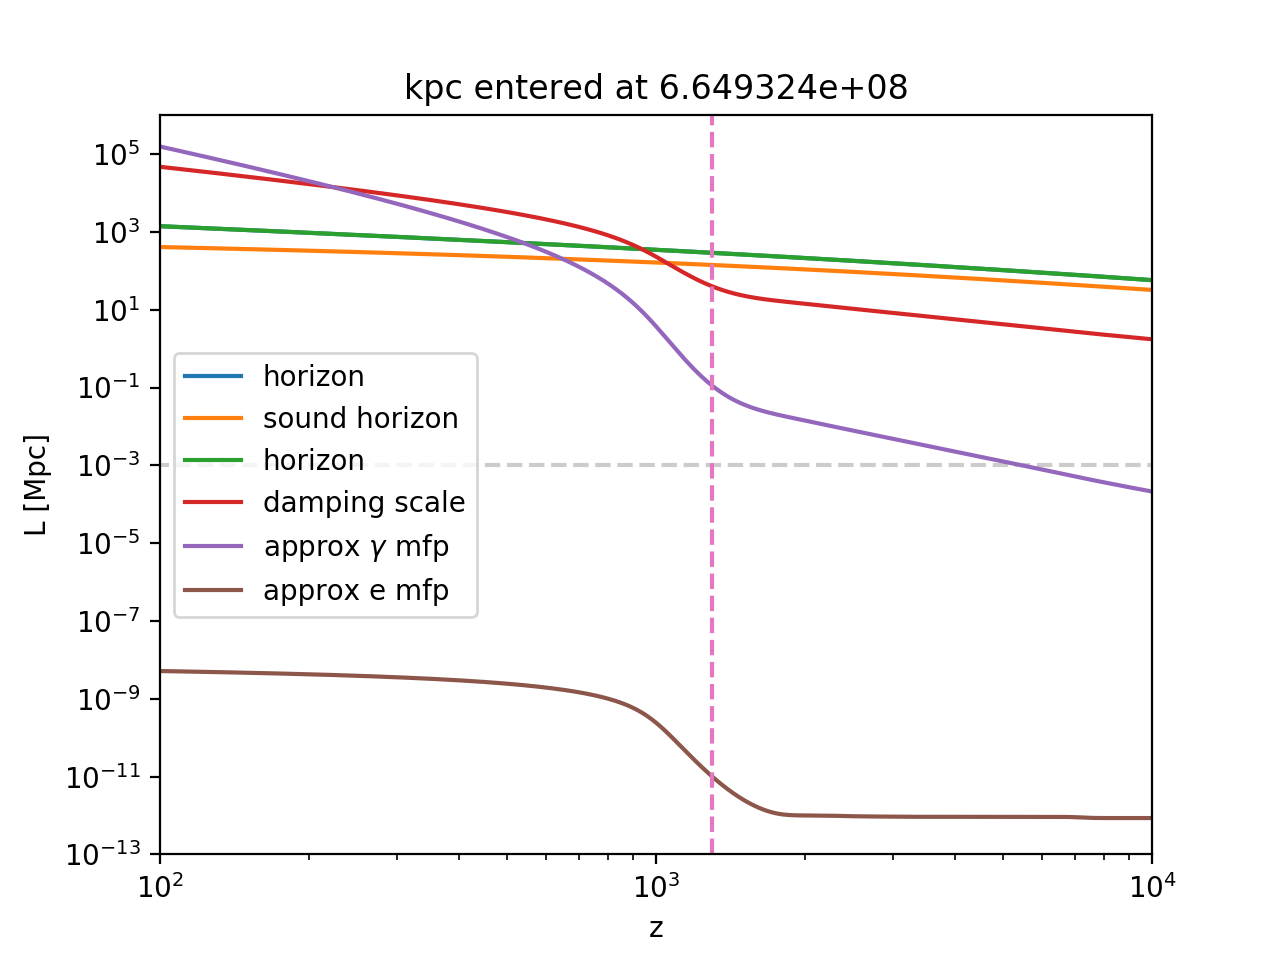

Text(0.5,1,'kpc entered at 6.649324e+08')

In [19]:
plt.subplots()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('z')
plt.ylabel('L [Mpc]')

plt.plot(background['z'], background['conf. time [Mpc]'], label='horizon')
z_kpc = interp1d( background['conf. time [Mpc]'], background['z'], kind='cubic')(0.001)
list_dumb = np.logspace(-5,3)
list_dumb2 = np.logspace(-3, 12)
plt.plot([z_kpc]*len(list_dumb), list_dumb, 'k--', alpha=0.2)
plt.plot(list_dumb2, [1e-3]*len(list_dumb2), 'k--', alpha=0.2)
plt.title('kpc entered at %e' %(z_kpc))

<IPython.core.display.Javascript object>


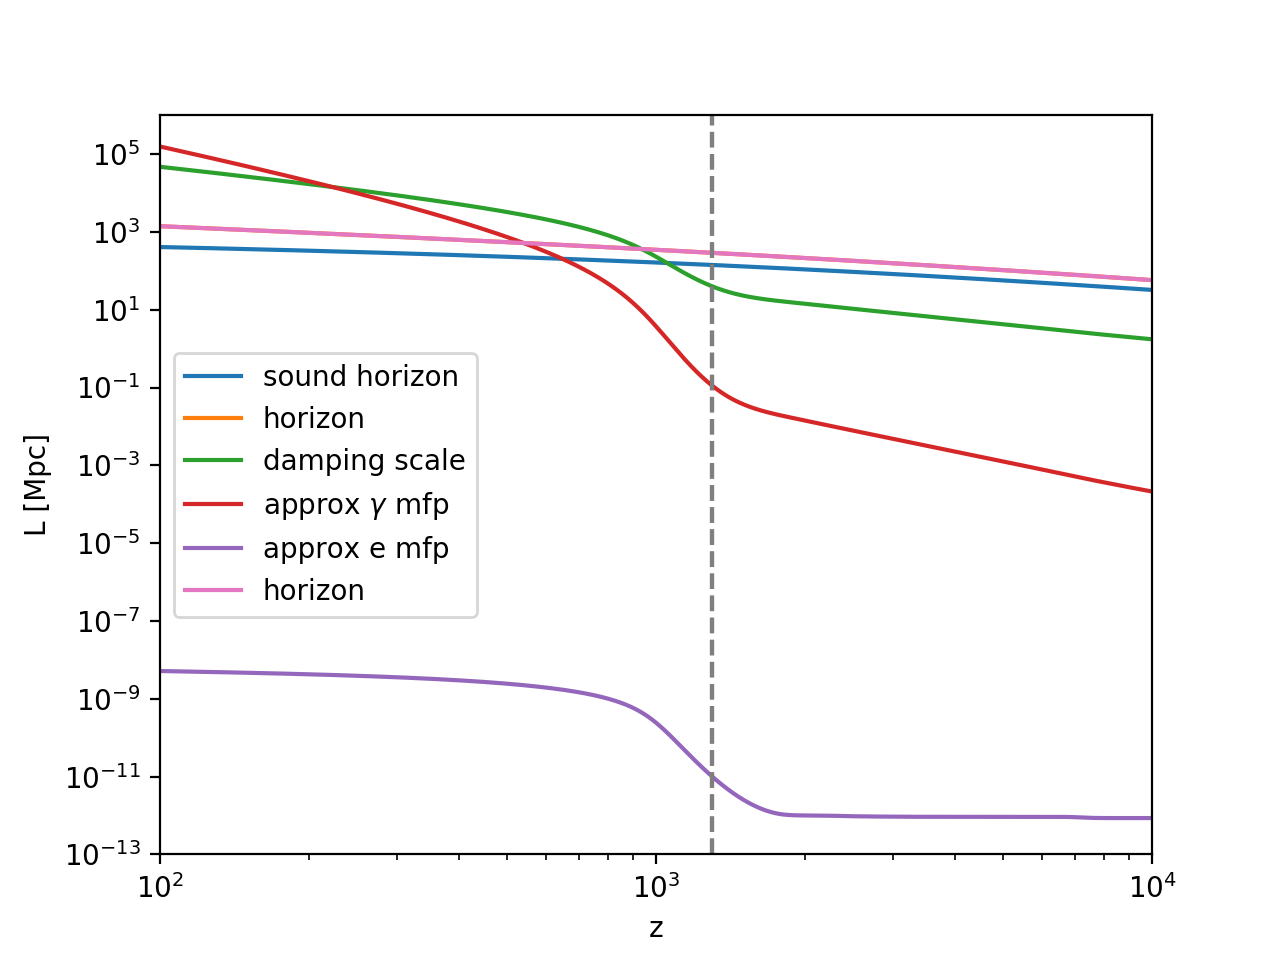

(100, 10000)

In [46]:
plt.figure(1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('z')
plt.ylabel('L [Mpc]')

plt.plot(background['z'], background['comov.snd.hrz.'], label='sound horizon')
plt.plot(background['z'], background['conf. time [Mpc]'], label='horizon')
plt.plot(thermodynamics['z'], thermodynamics['r_d'], label='damping scale')
rmfp = thermodynamics['r_d']**2/np.interp(thermodynamics['z'], background['z'],background['conf. time [Mpc]'])
plt.plot(thermodynamics['z'], rmfp, label='approx $\gamma$ mfp')
plt.plot(thermodynamics['z'], 1/thermodynamics['x_e']*1e-12, label='approx e mfp')

lst_L = np.logspace(-13, 6)
plt.plot([z_rec]*len(lst_L), lst_L, '--')

plt.legend(loc='best')
plt.ylim(1e-13, 1e6)
plt.xlim(100, 10000)

<IPython.core.display.Javascript object>


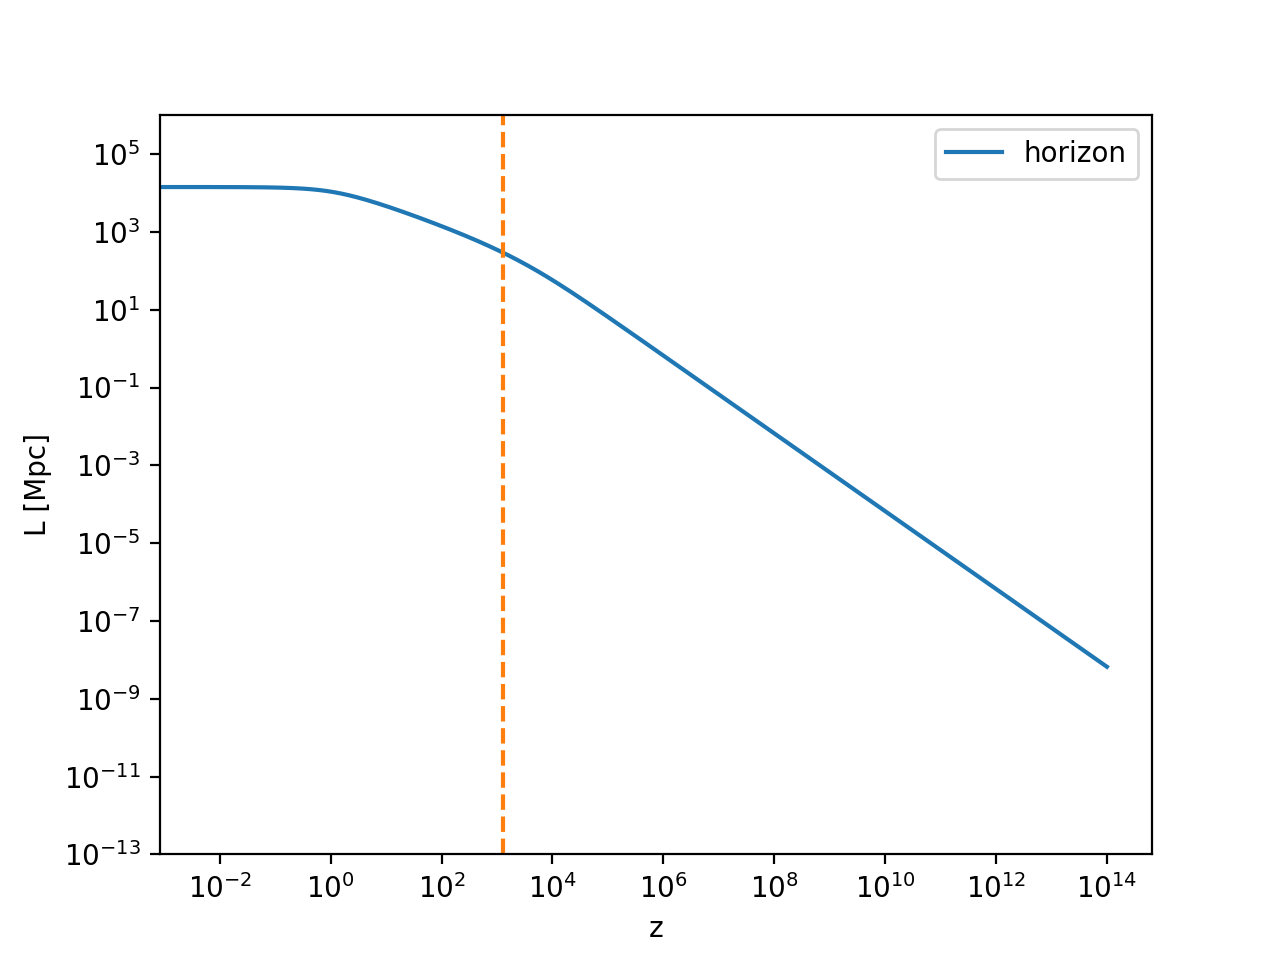

(1e-13, 1000000.0)

In [49]:
plt.subplots()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('z')
plt.ylabel('L [Mpc]')

plt.plot(background['z'], background['conf. time [Mpc]'], label='horizon')

lst_L = np.logspace(-13, 6)
plt.plot([z_rec]*len(lst_L), lst_L, '--')

plt.legend(loc='best')
plt.ylim(1e-13, 1e6)
#plt.xlim(100, 10000)

<IPython.core.display.Javascript object>


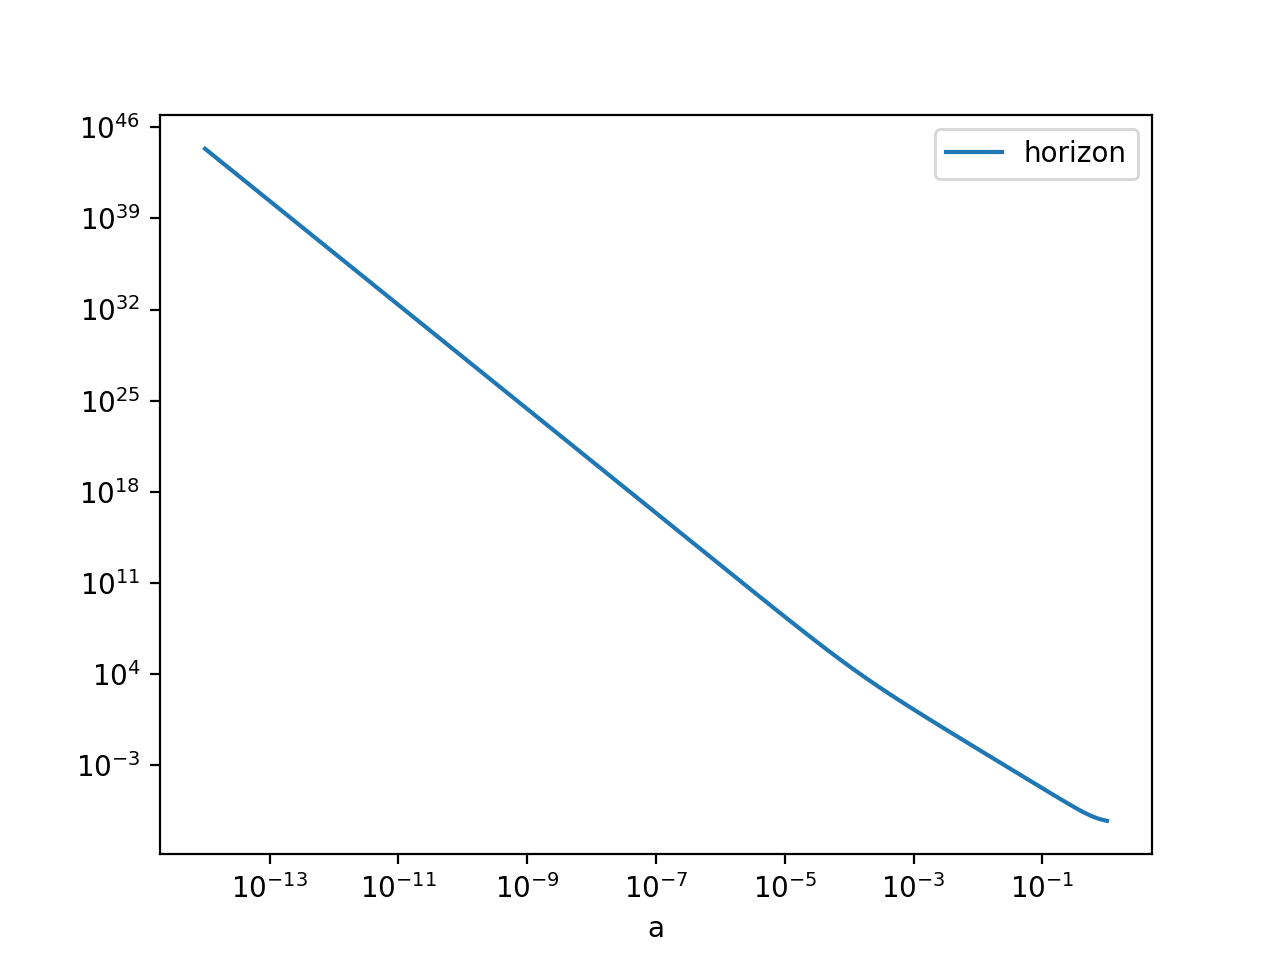

In [54]:
plt.subplots()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('a')
#plt.ylabel('L [Mpc]')

plt.plot(1/(background['z']+1), background['(.)rho_tot'], label='horizon')

#lst_L = np.logspace(-13, 6)
#plt.plot([z_rec]*len(lst_L), lst_L, '--')

plt.legend(loc='best')
#plt.ylim(1e-13, 1e6)
#plt.xlim(100, 10000)

<IPython.core.display.Javascript object>


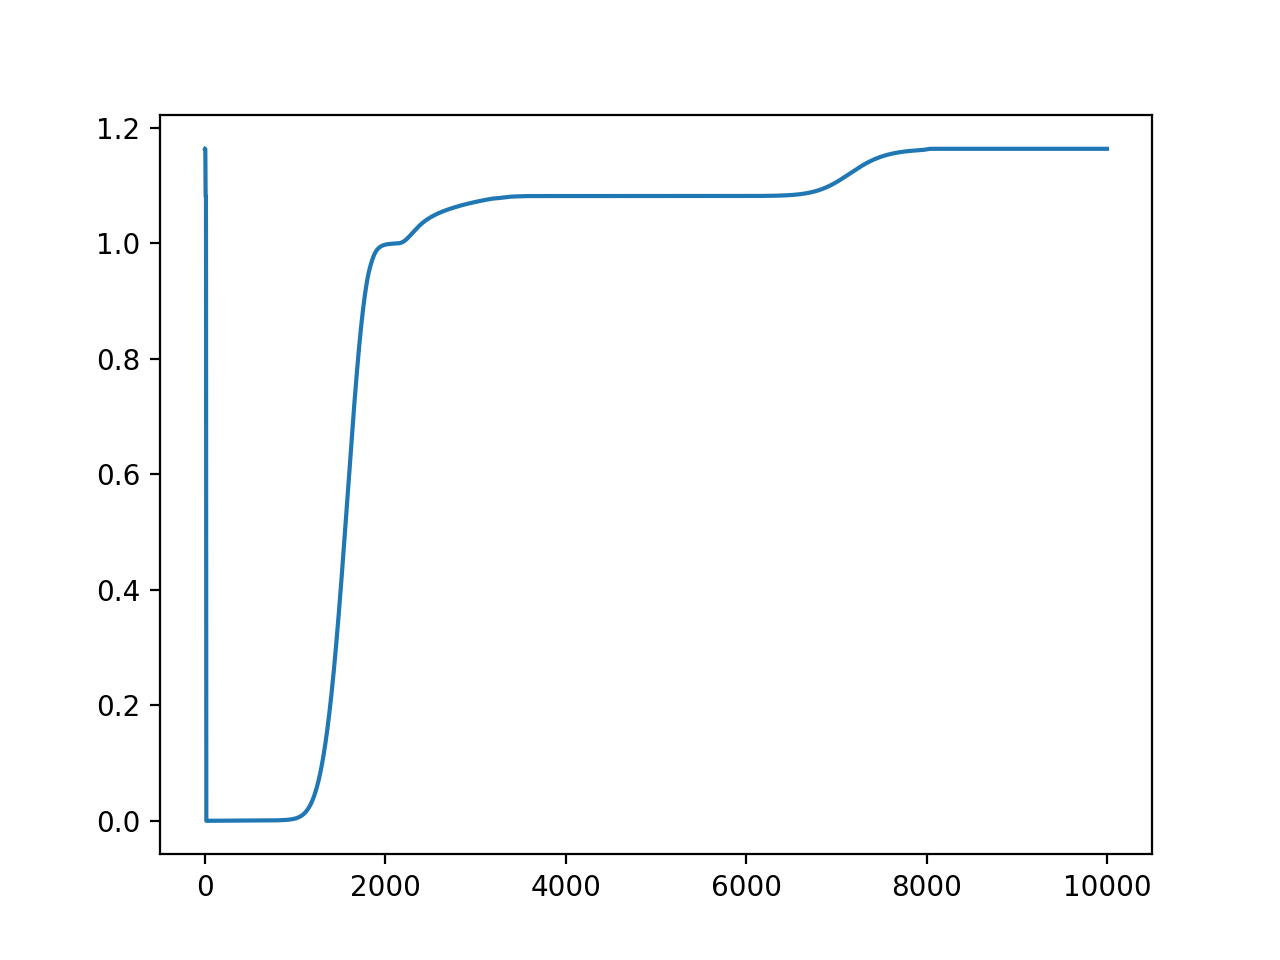

In [21]:
plt.subplots()
plt.plot(thermodynamics['z'], thermodynamics['x_e'])

<IPython.core.display.Javascript object>


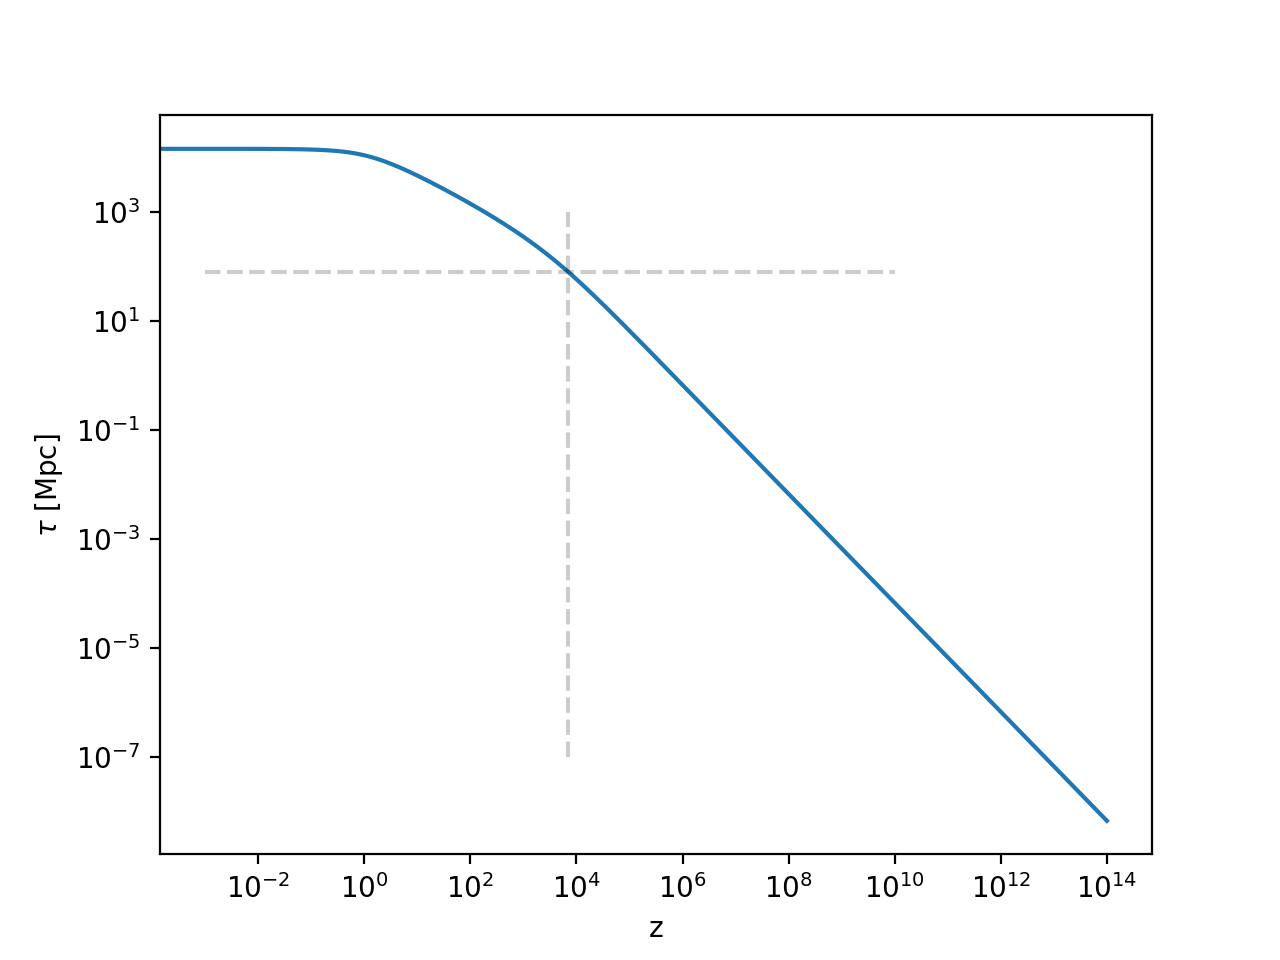

Text(0,0.5,'$\\tau$ [Mpc]')

In [22]:
plt.subplots()
plt.xscale('log')
plt.yscale('log')
#plt.plot(thermodynamics['conf. time [Mpc]'], rmfp, label='approx $\gamma$ mfp')
#plt.plot(thermodynamics['z'],thermodynamics['conf. time [Mpc]'], label='approx $\gamma$ mfp')
plt.plot(background['z'],background['conf. time [Mpc]'], label='approx $\gamma$ mfp')
plt.plot(np.logspace(-3,10), [tau_eq]*50, 'k--', alpha=0.2)
plt.plot([z_eq]*50, np.logspace(-7,3), 'k--', alpha=0.2)
plt.xlabel('z')
plt.ylabel(r"$\tau$ [Mpc]")

<IPython.core.display.Javascript object>


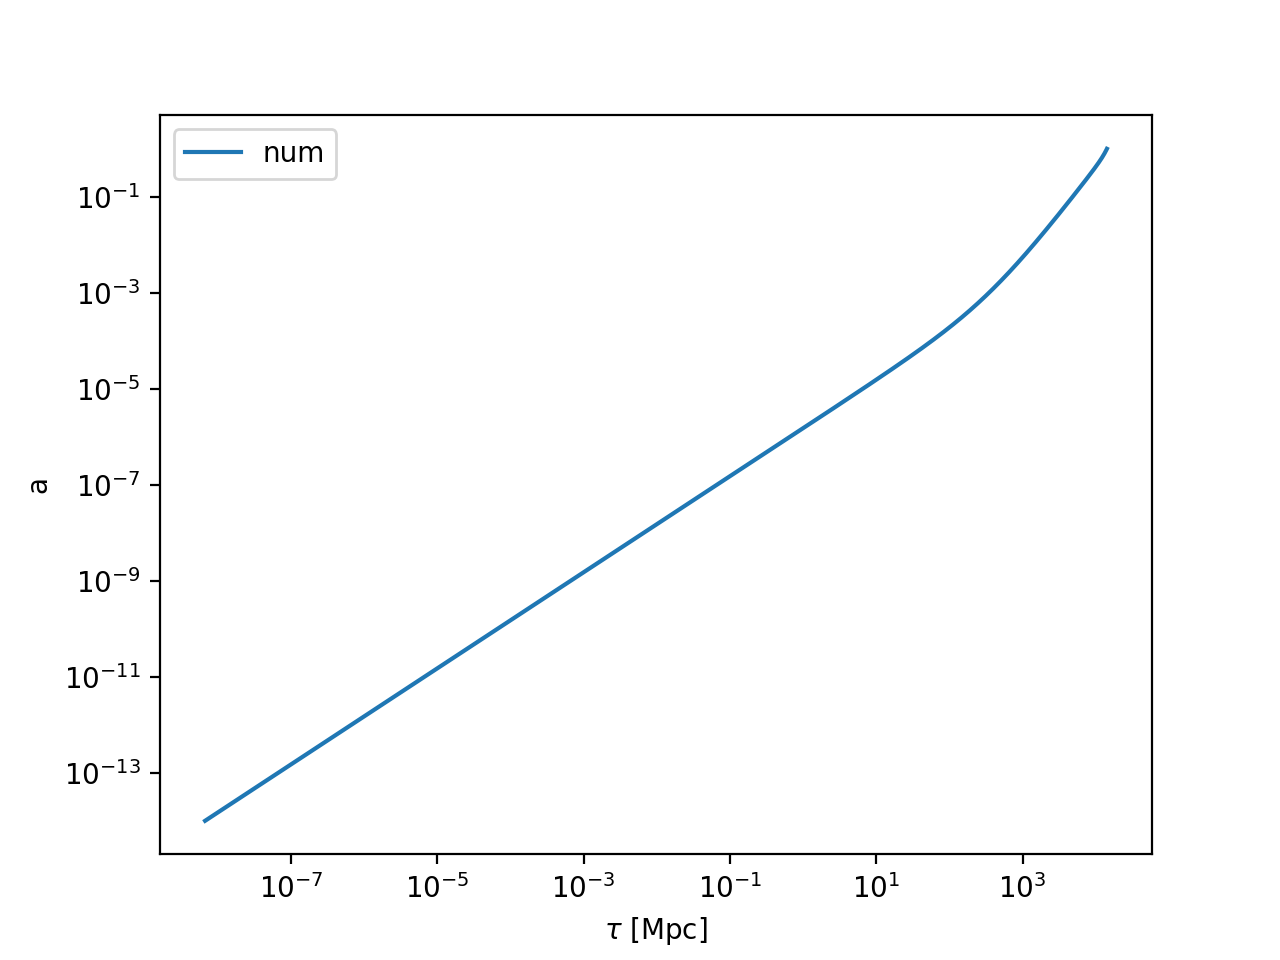

In [23]:
plt.subplots()
plt.xscale('log')
plt.yscale('log')
plt.plot(background['conf. time [Mpc]'], 1/(background['z']+1), label='num')
#plt.plot(background['conf. time [Mpc]'], a_eq/tau_eq*background['conf. time [Mpc]'], '--')
#plt.plot(background['conf. time [Mpc]'], a(background['conf. time [Mpc]']), '--', label=r"$(\tau /\tau_{eq}) a_{eq}$")
plt.ylabel('a')
plt.xlabel(r"$\tau$ [Mpc]")
plt.legend(loc='best')

# Solving the axion growth 

The equation of motion for BG is 
\begin{align}
\phi'' + 2 \mathcal{H} \phi' + a^2 V_{,\phi}(\phi) = 0
\end{align}

The equation of motion for the perturbation is 
\begin{align}
\delta \phi'' + 2 \mathcal{H} \delta\phi' + (k^2 + V_{,\phi\phi} a^2 ) \delta \phi = 
4\phi' \Phi' - 2a^2 V_{, \phi} \Phi
\end{align}

### Background level

In [24]:
from scipy.integrate import solve_ivp
from MyUnit import NaturalUnit
MplxMpc = NaturalUnit('Mpl*Mpc').val
MplxMpc

1.90919755576431e+57

In [55]:
NaturalUnit('eV*Mpc').val 

1.56374962590552e+29

In [56]:
np.sqrt(8*np.pi)

5.0132565492620005

In [25]:
# write small quantities in 1/Mpc units, (H, m, tau)
m = NaturalUnit('1e-22*eV*Mpc').val
print('%e' %m)

# write large quantities in Mpl units, (phi, f)
f = NaturalUnit('1e15*GeV/Mpl').val
print('%e' %f)
print('%e' %(2.3*f))


1.563750e+07
8.190612e-05
1.883841e-04


In [26]:
# bg quantities 
z_rec = cosmo.get_current_derived_parameters(['z_rec'])['z_rec']
print('recombinaion happened at z=%.1f' %z_rec)
z_eq = cosmo.get_current_derived_parameters(['z_eq'])['z_eq']
tau_eq = interp1d(background['z'], background['conf. time [Mpc]'], kind='cubic')(z_eq)
a_eq = cosmo.get_current_derived_parameters(['a_eq'])['a_eq']
print('matter-radiation equality happened at z=%.1f, tau=%.1f Mpc' %(z_eq, tau_eq))

# critical params, the start of oscillation
tau_crit = np.sqrt(2./m*tau_eq/a_eq)
a_crit = np.sqrt(2.*a_eq/m/tau_eq)
z_crit = 1./a_crit - 1.
k_crit = m * a_crit

print tau_crit
print a_crit
print z_crit
print z_eq
print k_crit

print '----'
print a_eq
print tau_eq
print cosmo.get_current_derived_parameters(['tau_rec'])['tau_rec']

recombinaion happened at z=1298.6
matter-radiation equality happened at z=6982.9, tau=78.9 Mpc
0.2654303845052692
4.818503077172389e-07
2075332.322370365
6982.91613099
7.534932384352919
----
0.000143186141019
78.87501960234734
290.329020414


In [38]:
# bg func
def a(tau):
    return tau/tau_eq*a_eq

# potential
def V(phi): 
    # in Mpl**2/Mpc**2
    return 1./2.*m**2 * phi**2 - 1./24.*m**2/f**2 * phi**4 

def dV(phi):
    # in Mpl/Mpc**2
    return m**2 * phi  - 1./6.*m**2/f**2 * phi**3 

def ddV(phi):
    # in 1/Mpc**2
    phi = np.asarray(phi)
    scalar_input = False
    if phi.ndim ==0:
        phi = phi[None]
        scalar_input = True
    
    res = [m**2]*len(phi) - 1./2.*m**2/f**2 * phi**2 
    
    if scalar_input:
        res = np.squeeze(res)
    else:
        res = np.asarray(res)
    return res

# e.o.m.
def dydtau(tau, y):
    phi, dphi = y
    rhs1 = dphi
    rhs2 = -2./tau * dphi - dV(phi)*a(tau)**2 # assume rad dom
    return [rhs1, rhs2]

# i.c.
y0 = [f*2.3, 0.]
#tau0 = 1e-100
tau0 = tau_crit/10.

# duration
taue = tau_crit*50.
tauspan = [tau0, taue]

# solve
sol = solve_ivp(dydtau, tauspan, y0, method='RK45', rtol=1e-10, atol=1e-10)
#phipp = np.gradient(sol.y[1], sol.t, edge_order=2)

# output
print y0
print sol.message
print sol.nfev


[0.00018838407417418157, 0.0]
The solver successfully reached the end of the integration interval.
81590


In [39]:
# background_functions()

def phi_of_tau(tau):
    return np.interp(tau, sol.t, sol.y[0])

<IPython.core.display.Javascript object>


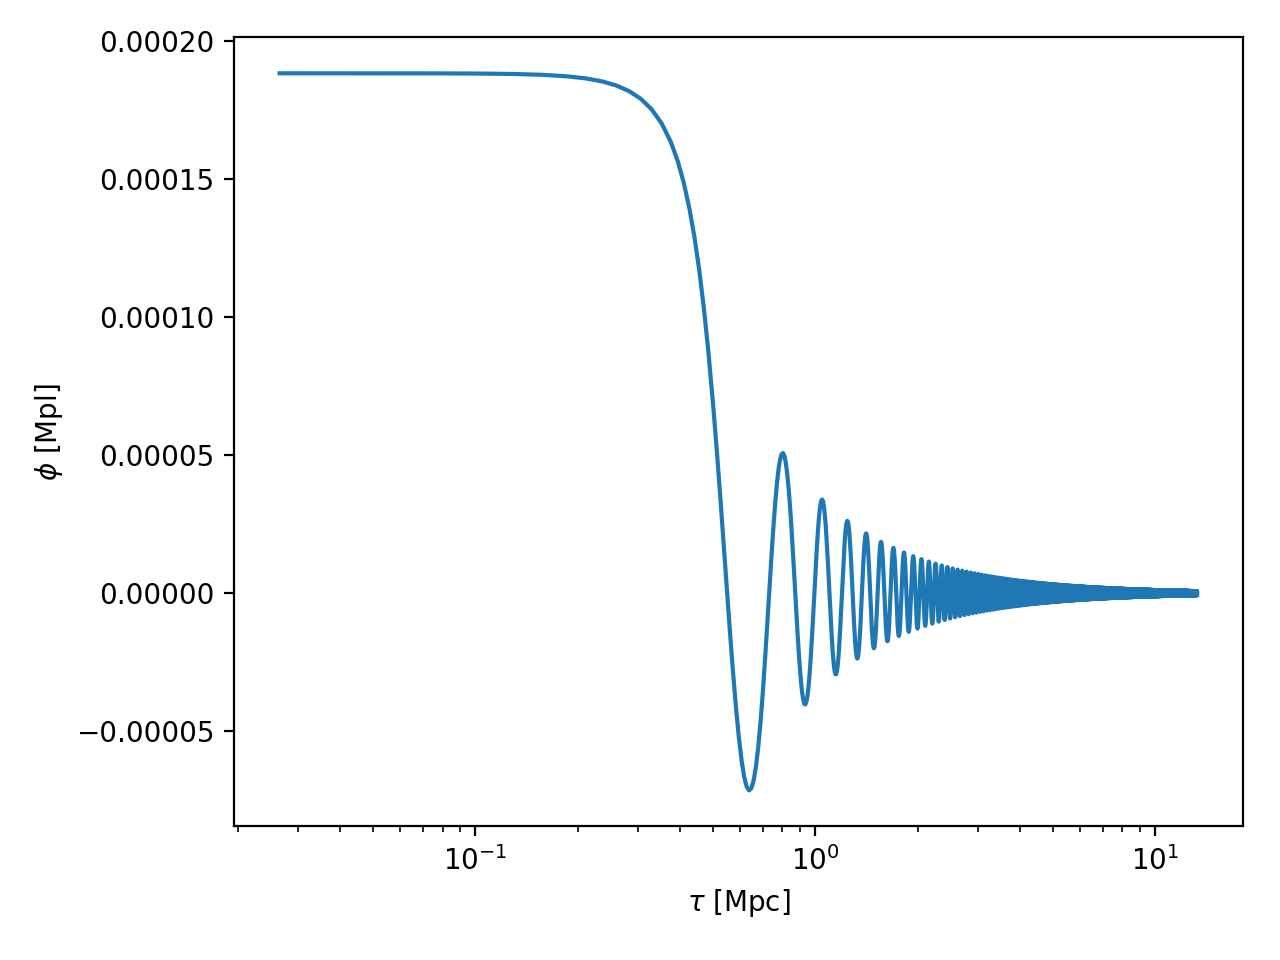

<IPython.core.display.Javascript object>


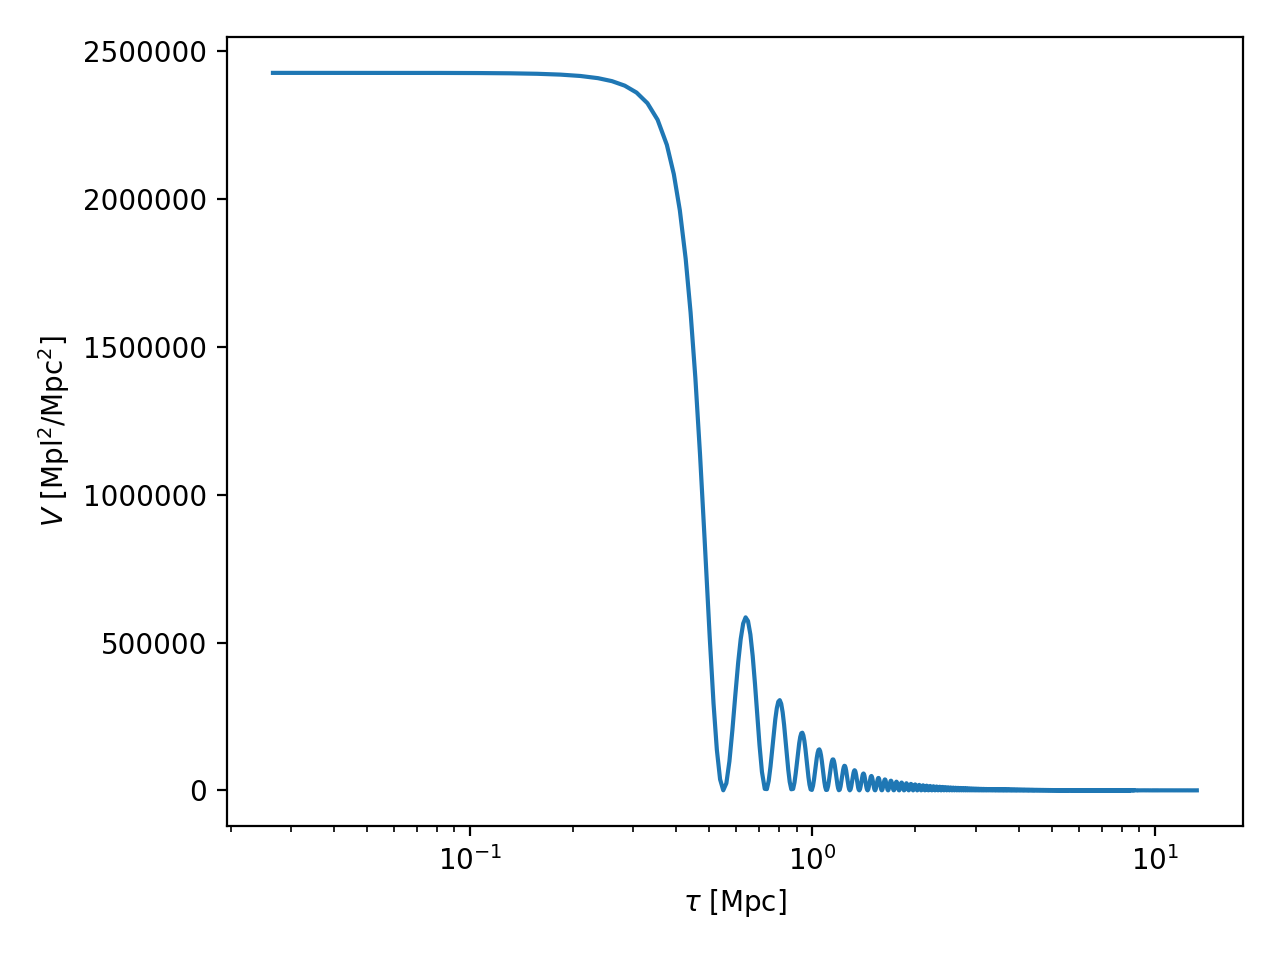

<IPython.core.display.Javascript object>


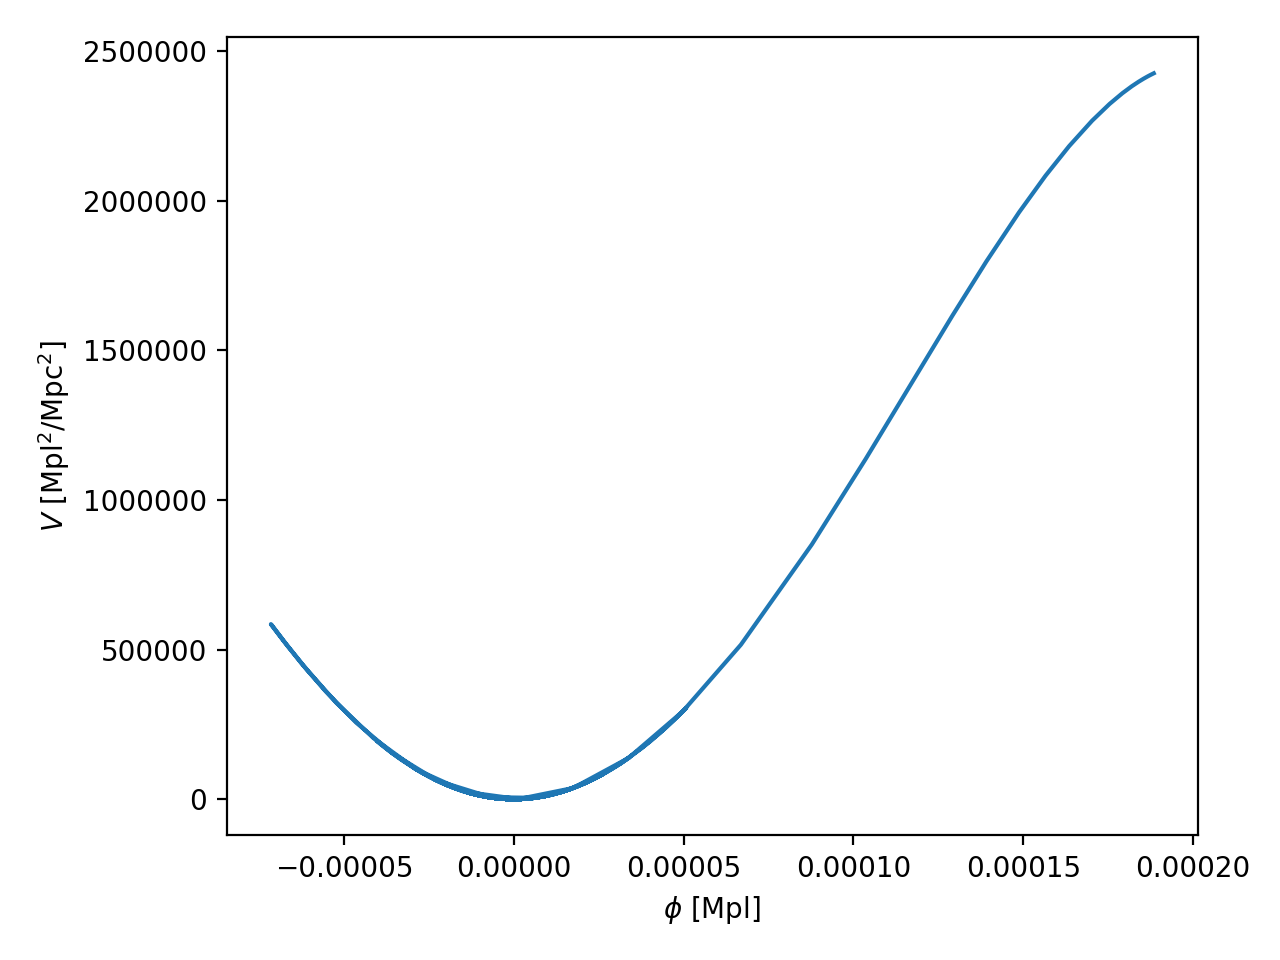

<IPython.core.display.Javascript object>


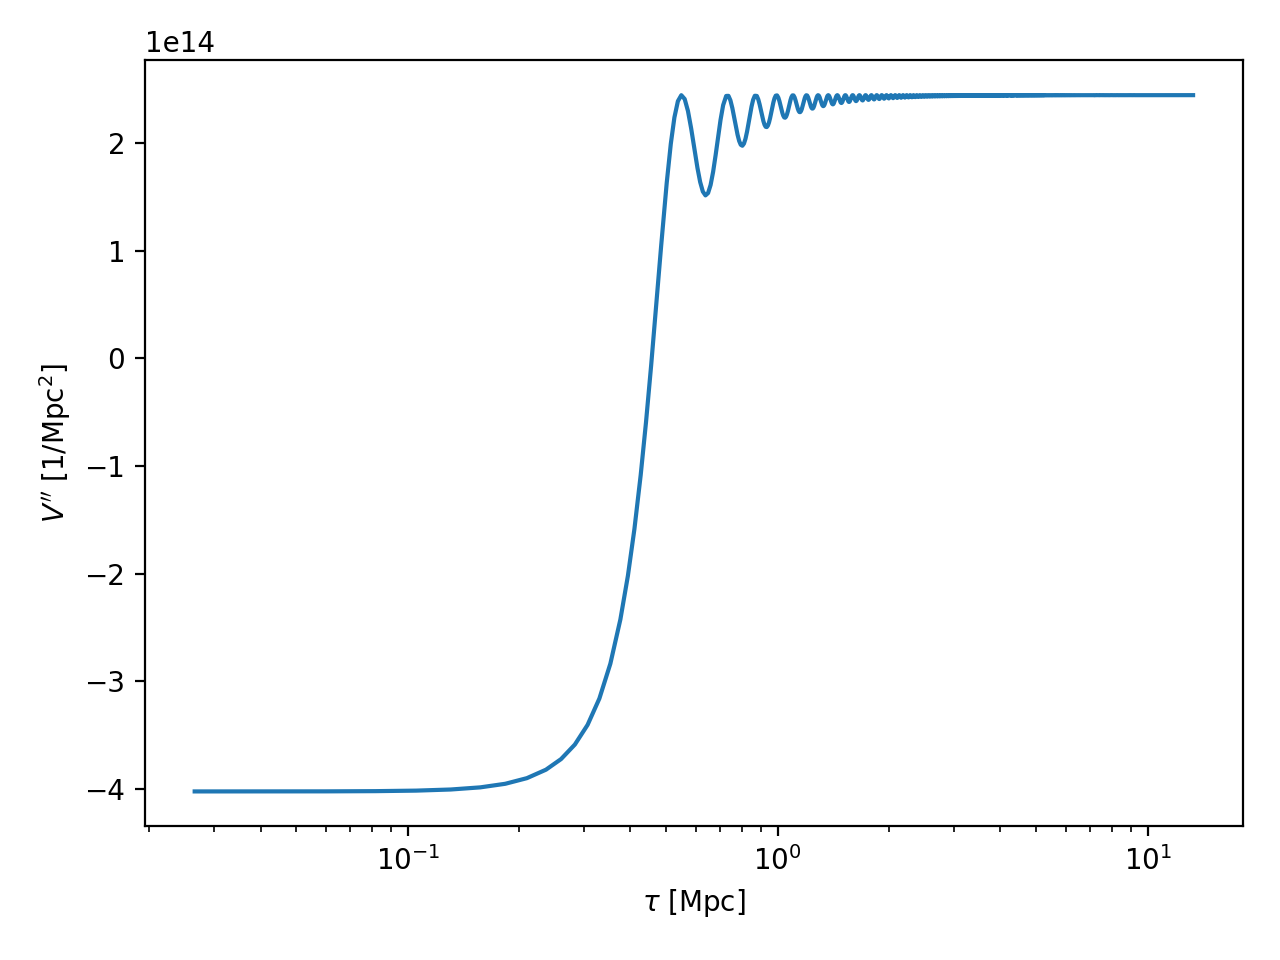

<IPython.core.display.Javascript object>


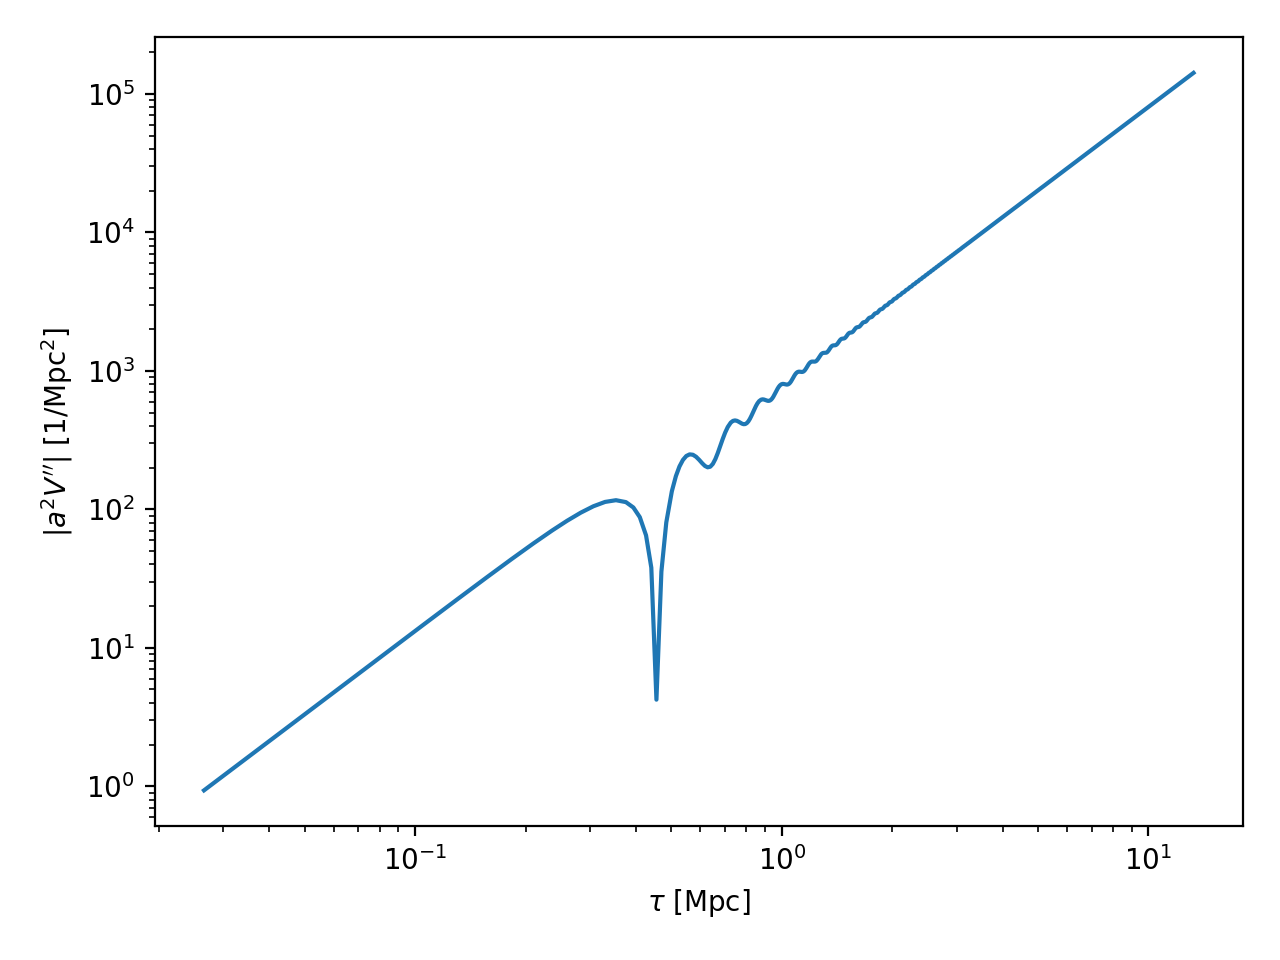

In [40]:
plt.subplots()
plt.xscale('log')
plt.xlabel(r"$\tau$ [Mpc]")
plt.ylabel(r"$\phi$ [Mpl]")
plt.plot(sol.t, sol.y[0])
plt.tight_layout()

plt.subplots()
plt.xscale('log')
plt.xlabel(r"$\tau$ [Mpc]")
plt.ylabel(r"$V$ [Mpl$^2$/Mpc$^2$]")
plt.plot(sol.t, V(sol.y[0]))
plt.tight_layout()

plt.subplots()
plt.xlabel(r"$\phi$ [Mpl]")
plt.ylabel(r"$V$ [Mpl$^2$/Mpc$^2$]")
plt.plot(sol.y[0], V(sol.y[0]))
plt.tight_layout()

# plt.subplots()
# plt.xscale('log')
# plt.xlabel(r"$\tau$ [Mpc]")
# plt.ylabel(r"$V'$ [Mpl/Mpc$^2$]")
# plt.plot(sol.t, dV(sol.y[0]))
# plt.tight_layout()

plt.subplots()
plt.xscale('log')
plt.xlabel(r"$\tau$ [Mpc]")
plt.ylabel(r"$V''$ [1/Mpc$^2$]")
plt.plot(sol.t, ddV(sol.y[0]))
plt.tight_layout()

plt.subplots()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$\tau$ [Mpc]")
plt.ylabel(r"$|a^2 V''|$ [1/Mpc$^2$]")
plt.plot(sol.t, np.abs(ddV(phi_of_tau(sol.t))*a(sol.t)**2))
plt.tight_layout()

<IPython.core.display.Javascript object>


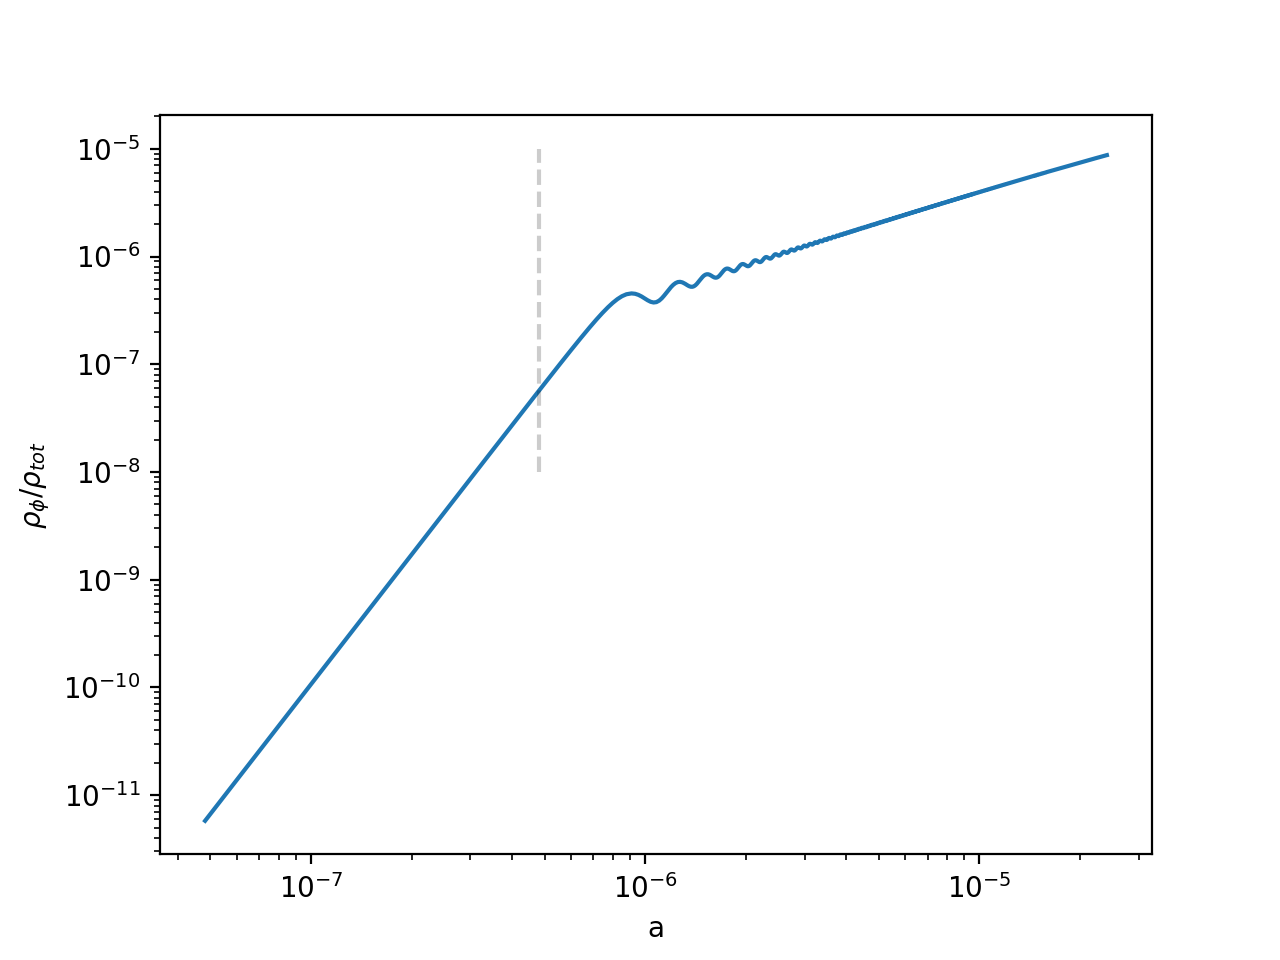

<IPython.core.display.Javascript object>


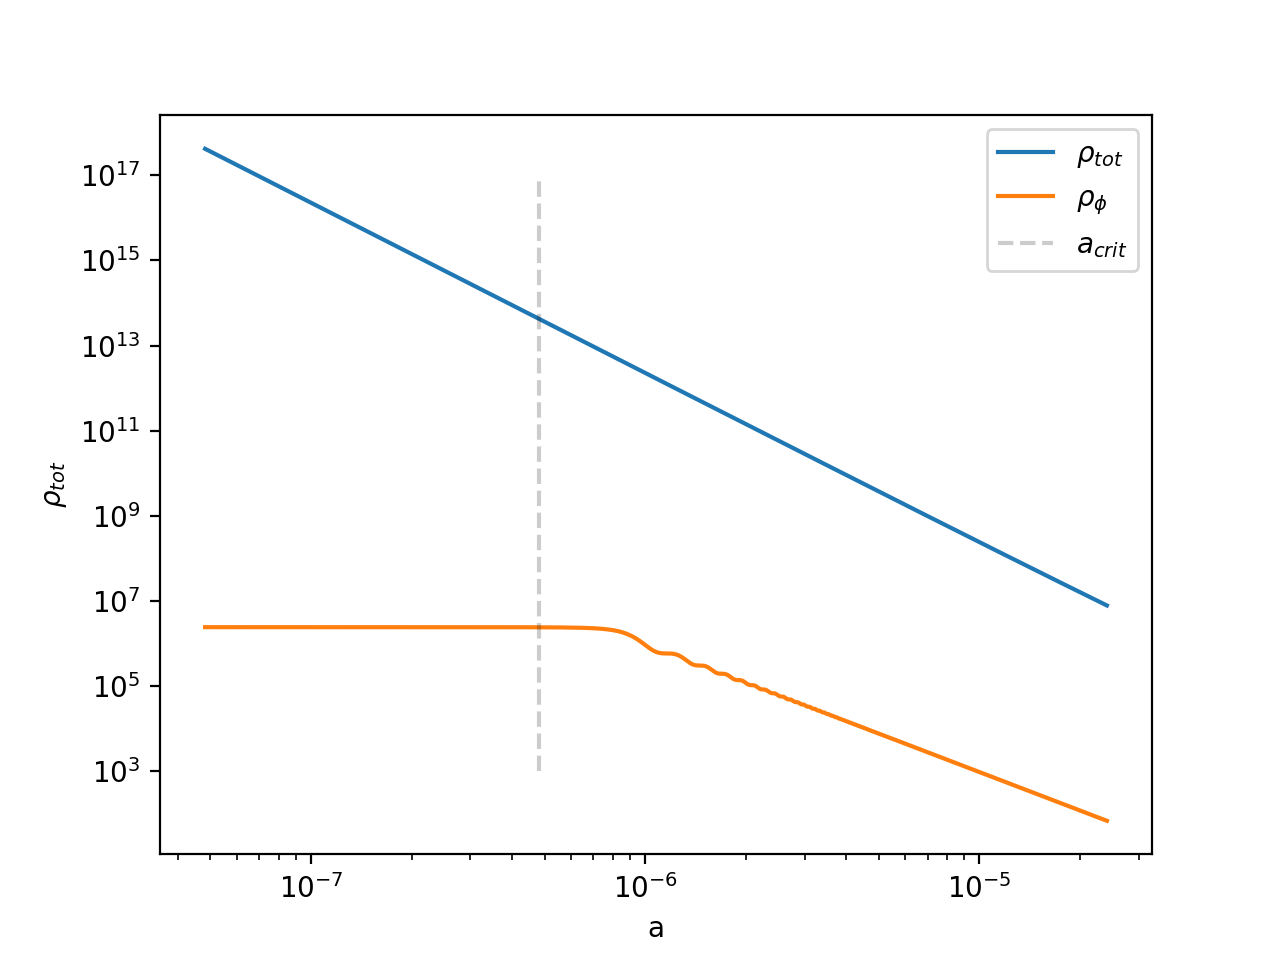

In [30]:
# plot out rho_phi
def rho_phi(sol):
    return sol.y[1]**2/2./a(sol.t)**2 + V(sol.y[0])

rho_tot = interp1d(background['z'], background['(.)rho_tot'], kind='cubic')(1./a(sol.t) - 1.)


plt.subplots()
plt.yscale('log')
plt.xscale('log')
plt.plot(a(sol.t), rho_phi(sol)/rho_tot)
tmp_list = np.logspace(-8,-5)
plt.plot([a_crit]*len(tmp_list), tmp_list, 'k--', alpha=0.2)
plt.xlabel('a')
plt.ylabel(r"$\rho_\phi/\rho_{tot}$")

plt.subplots()
plt.yscale('log')
plt.xscale('log')
plt.plot(a(sol.t), rho_tot, label=r"$\rho_{tot}$")
plt.plot(a(sol.t), rho_phi(sol), label=r"$\rho_{\phi}$")
tmp_list = np.logspace(3,17)
plt.plot([a_crit]*len(tmp_list), tmp_list, 'k--', alpha=0.2, label='$a_{crit}$')
plt.xlabel('a')
plt.ylabel(r"$\rho_{tot}$")
plt.legend(loc='best')

<IPython.core.display.Javascript object>


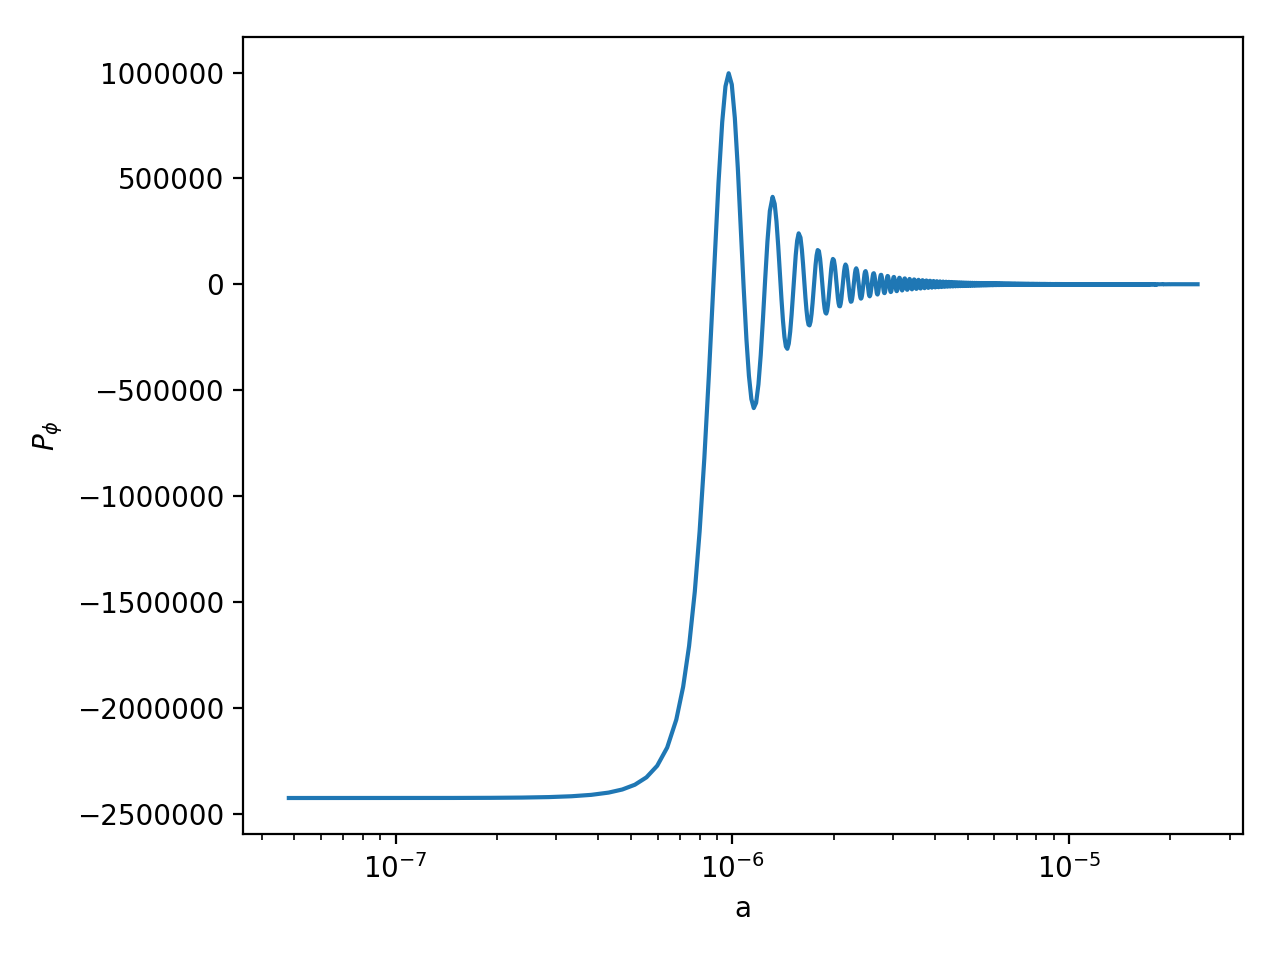

<IPython.core.display.Javascript object>


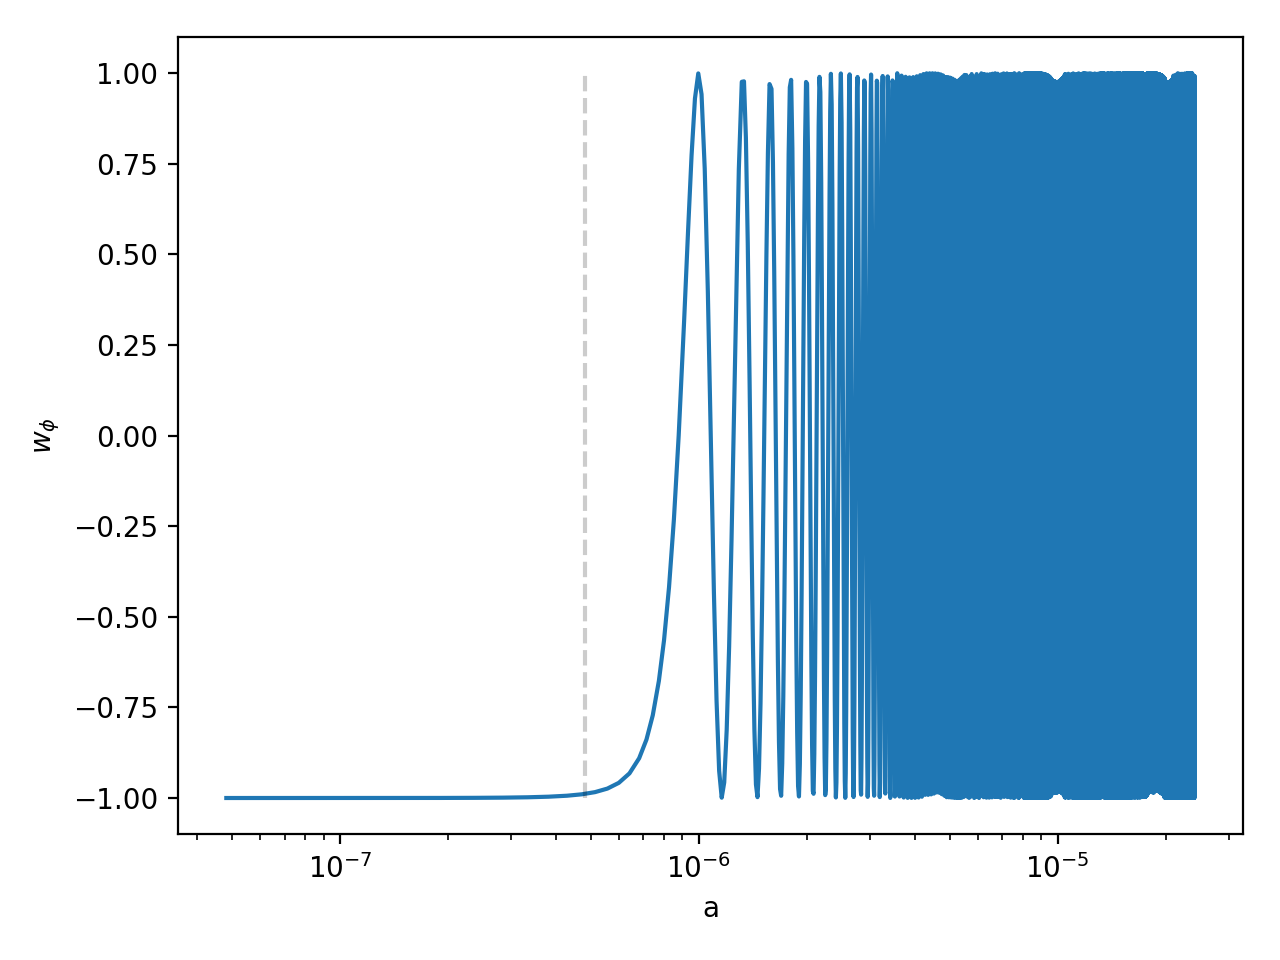

In [31]:
# pressure and e.o.s
def P_phi(sol):
    return sol.y[1]**2/2./a(sol.t)**2 - V(sol.y[0])

plt.subplots()
# plt.yscale('log')
plt.xscale('log')
plt.plot(a(sol.t), P_phi(sol))
tmp_list = np.logspace(-8,-5)
plt.plot([a_crit]*len(tmp_list), tmp_list, 'k--', alpha=0.2)
plt.xlabel('a')
plt.ylabel(r"$P_\phi$")
plt.tight_layout()

plt.subplots()
# plt.yscale('log')
plt.xscale('log')
plt.plot(a(sol.t), P_phi(sol)/rho_phi(sol))
tmp_list = np.linspace(-1,1)
plt.plot([a_crit]*len(tmp_list), tmp_list, 'k--', alpha=0.2)
plt.xlabel('a')
plt.ylabel(r"$w_\phi$")
plt.tight_layout()

### Perturbation level

<IPython.core.display.Javascript object>


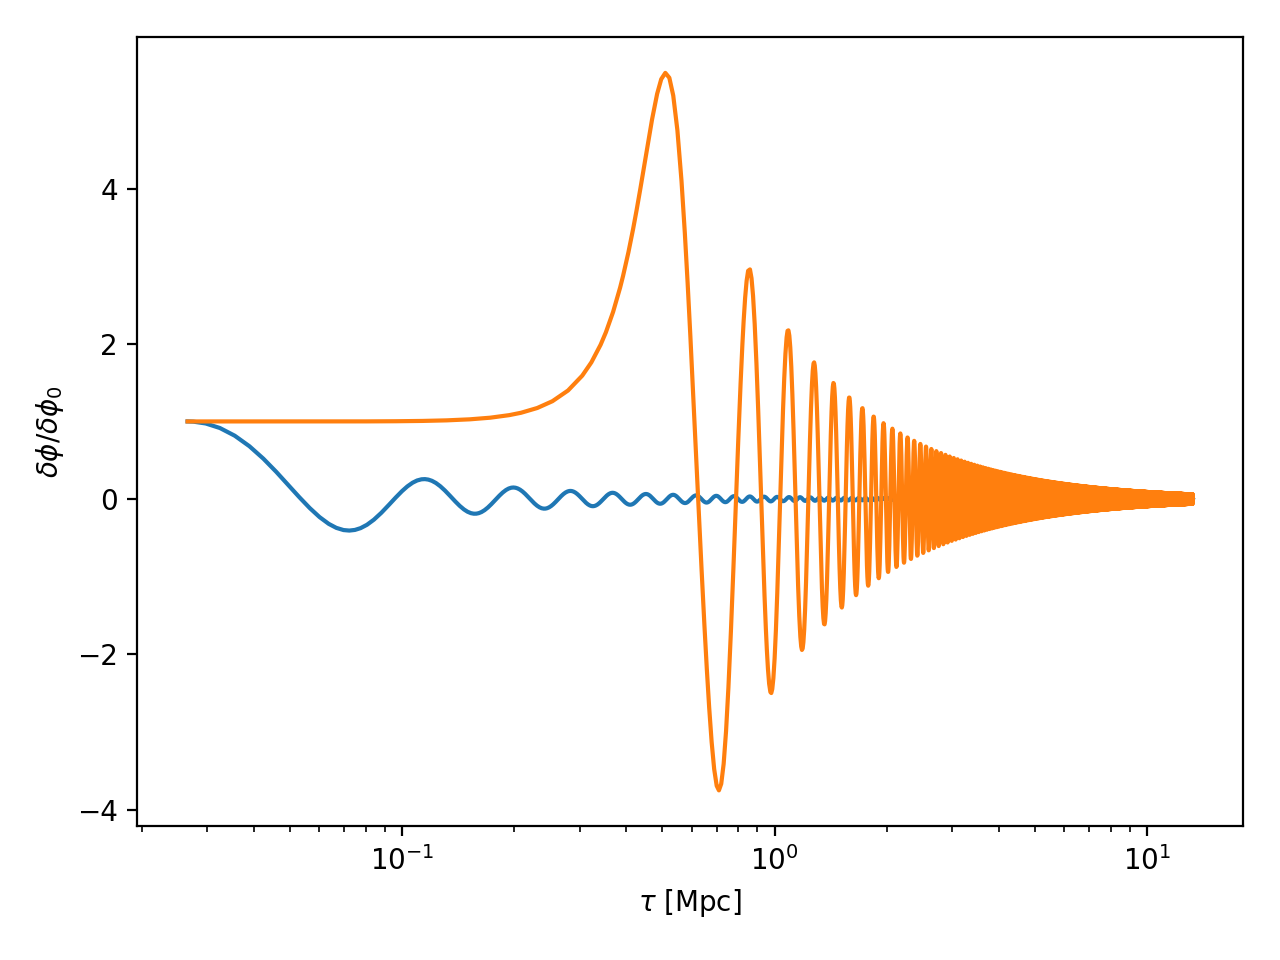

----------
[1.0, 0.0]
[0.0, -5676.586651537732]
The solver successfully reached the end of the integration interval.
61652
----------
[1.0, 0.0]
[0.0, -1.337056102165942]
The solver successfully reached the end of the integration interval.
83792


In [32]:
# solve the perturbation
# neglecting the gravitational source term,
# as we want to see the solitonic collapse first




# i.c.
y0 = [1., 0.]
#tau0 = 0.01

# duration
#taue = 5.
tauspan = [tau0, taue]

def perturb_solve(kspan):
    # choose k mode, in 1/Mpc
    #k = k_crit/10.
    #k = k_crit/10.
    for k in kspan:

        # e.o.m
        def dydtau(tau, y):
            phi, dphi = y
            rhs1 = dphi
            rhs2 = -2./tau * dphi - (k*k + ddV(phi_of_tau(tau))*a(tau)**2)*phi # assume rad dom
            return [rhs1, rhs2]

        # solve
        solp = solve_ivp(dydtau, tauspan, y0, method='RK45', rtol=1e-6, atol=1e-6)

        # output
        print '----------'
        print y0
        print dydtau(tau0, y0)
        print solp.message
        print solp.nfev
        plt.plot(solp.t, solp.y[0])
    plt.xscale('log')
    plt.xlabel(r"$\tau$ [Mpc]")
    plt.ylabel(r"$\delta\phi/\delta\phi_0$")
    plt.tight_layout()
    return

plt.subplots()
kspan = [k_crit*10., k_crit/5.]
perturb_solve(kspan)

In [33]:
#scf_parameters = [scf_lambda, scf_alpha, scf_A, scf_B, phi, phi_prime]
#scf_parameters = [scf_m, scf_f, phi, phi_prime]